# VLBI observations evolution
----

This note gives some plots to show evolution for the number of VLBI observations and also some simple histograms.

In [1]:
from astropy.table import Table
from astropy.time import Time
import bottleneck as bn
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# My modules
from my_progs.vlbi.read_rms import read_rms

We retrieved the statistics information of each session from .rms file of the `opa2019a` solution.
These include the sessison designation, number of used delays (observations), post-fit rms of delay (in *ps*) and delay rate (in *fs/s*), as shown in the table below.

In [2]:
rmsfile = "opa2020a.rms"

rmstable = read_rms(rmsfile)

# Sort the table chronologically
rmstable.sort("ses_epo")

# Using data up to 2020
rmstable = rmstable[rmstable["ses_epo"] < 2020]

rmstable

ses_epo,db_name,obs_num,delay_rms,delay_rate_rms
yr,,,1e-12 s,1e-15
float64,str10,int64,float64,int64
1979.5852156057495,$79AUG03XX,467,38.49,116
1979.8973305954826,$79NOV25X,287,18.123,926001
1980.2751540041068,$80APR11XQ,1198,30.041,151
1980.5653661875428,$80JUL26X,1042,36.121,184
1980.56810403833,$80JUL27X,873,35.114,144
1980.7351129363449,$80SEP26X,559,19.128,180
1980.7378507871322,$80SEP27X,550,21.186,76
1980.7405886379192,$80SEP28X,475,18.18,76


The figure below shows the distribution of the number of delay in each session.

We can find that the typical number of delay in one session is about 1000.

The maximum is aabout 100,000, possibly from the CONT sessions.

While in some sessions, there is just 10-20 delays. 
These sessions might be not suitable to derive arc (session-wise) parameters.

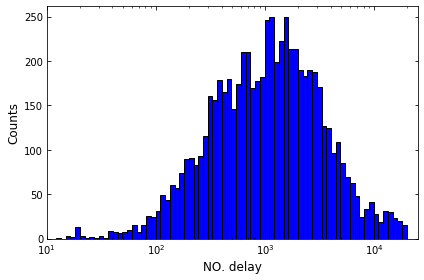

In [21]:
x = np.array(rmstable["obs_num"])
max_obs = rmstable["obs_num"].max()
bins = np.exp(np.arange(1, int(np.log(max_obs)), 0.1)) 

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, bins, edgecolor="k", facecolor="b")

ax.set_xlim([10, 25000])

ax.set_xlabel("NO. delay", fontsize=12)
ax.set_ylabel("Counts", fontsize=12)
ax.set_xscale("log")

ax.xaxis.set_ticks_position("both")
ax.yaxis.set_ticks_position("both")
# ax.set_title("Distribution of number of delay", fontsize=12)

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()


plt.tight_layout()
plt.savefig("num_obs_hist.eps", hbox="tight")
plt.savefig("num_obs_hist.png", hbox="tight")

The number of delay as a function of the observing epoch shows a general increasing trend as expected,
since the technique for observing, data storing, and participated stations are increasing.
Now the number of delay per session rises to about 4,000.

The dependency of the delay rms on the number of delays is rather complicated.

In [13]:
# Median number of observations vs epoch
window = 100
epomd = bn.move_median(rmstable["ses_epo"], window=window)
obsmd = bn.move_median(rmstable["obs_num"], window=window)

# delay rms vs. NO. delay
tmptable = Table(rmstable)
tmptable.keep_columns(["obs_num", "delay_rms"])
tmptable.sort("obs_num")
dlymd = bn.move_median(tmptable["obs_num"], window=window)
rmsmd = bn.move_median(tmptable["delay_rms"], window=window)

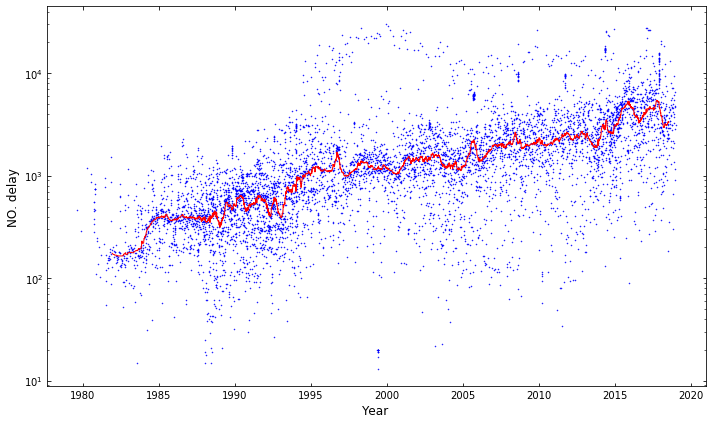

In [22]:
# No.obs vs. epoch
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(rmstable["ses_epo"], rmstable["obs_num"], "b.", ms=1)

ax.plot(epomd, obsmd, "r", lw=1)

ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("NO. delay", fontsize=12)

ax.set_yscale("log")

plt.tight_layout()
plt.savefig("num_obs_vs_epoch.eps", hbox="tight")
plt.savefig("num_obs_vs_epoch.png", hbox="tight")

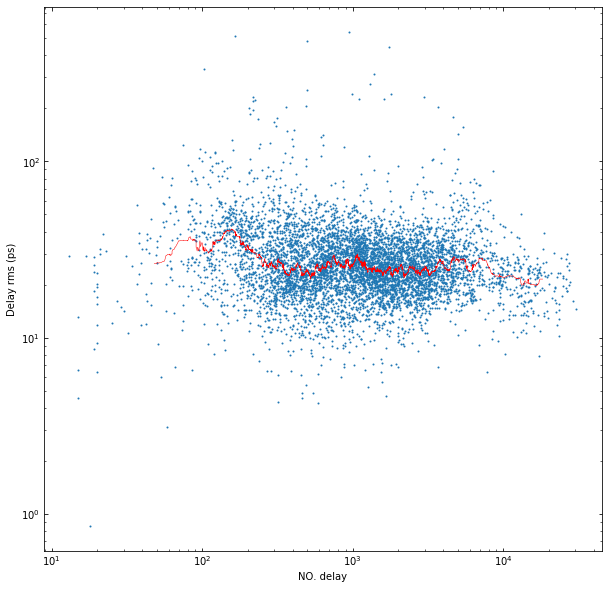

In [6]:
# delay rms vs. No. obs
plt.figure(figsize=(10, 10))

plt.plot(rmstable["obs_num"], rmstable["delay_rms"], ".", ms=2)
plt.plot(dlymd, rmsmd, "r", lw=0.5)

plt.xlabel("NO. delay")
plt.ylabel("Delay rms (ps)")

plt.xscale("log")
plt.yscale("log")

Then I look at the accumulated histogram of the VLBI observation amount.

The diagram below shows that the data used to conpile the ICRF3 catalog is twice that for ICRF2 catalog and 
nearly four times that for ICRF1 catalog.

In [7]:
total_obs = [ np.sum(rmstable["obs_num"][:i]) for i in range(len(rmstable)) ]

percent = np.array(total_obs) / total_obs[-1] * 100

print("The total number of VLBI observation is {}.".format(total_obs[-1]))

The total number of VLBI observation is 13496652.


In [8]:
# End epoch of ICRF1 data (Fey AJ 2015)
time1 = Time("1995-07-01", format="iso")
time1 = time1.jyear

# End epoch of ICRF2 data (Fey AJ 2015)
time2 = Time("2009-03-01", format="iso")
time2 = time2.jyear

# End epoch of ICRF3 data (I guessed)
time3 = Time("2017-07-01", format="iso")
time3 = time3.jyear

ind1, ind2, ind3 = np.searchsorted(rmstable["ses_epo"], [time1, time2, time3])

rate1, rate2, rate3 = np.take(percent, [ind1-1, ind2-1, ind3-1])

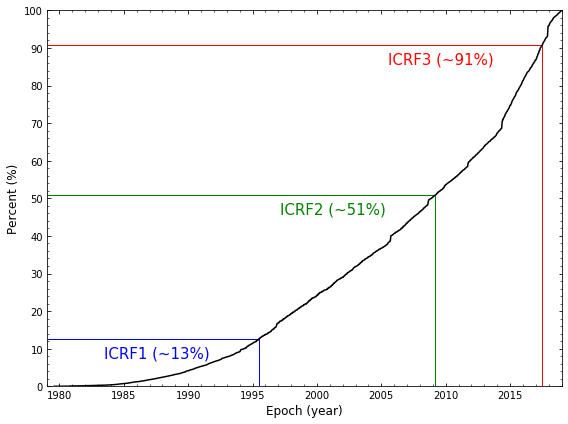

In [23]:
from matplotlib.ticker import MultipleLocator

# delay rms vs. No. obs
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(rmstable["ses_epo"], percent, "k", ms=2)
ax.set_xlabel("Epoch (year)", fontsize=12)
ax.set_ylabel("Percent (%)", fontsize=12)

ax.xaxis.set_ticks_position("both")
ax.yaxis.set_ticks_position("both")

ax.yaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(2))
ax.xaxis.set_minor_locator(MultipleLocator(1))

# ICRF1
ax.vlines(time1, 0, rate1, color="b", lw=1)
ax.hlines(rate1, 1979, time1, color="b", lw=1)
ax.text(time1-12, rate1-5, "ICRF1 (~{:.0f}%)".format(rate1), color="b", fontsize=15)

# ICRF2
ax.vlines(time2, 0, rate2, color="g", lw=1)
ax.hlines(rate2, 1979, time2, color="g", lw=1)
ax.text(time2-12, rate2-5, "ICRF2 (~{:.0f}%)".format(rate2), color="g", fontsize=15)

# ICRF3
ax.vlines(time3, 0, rate3, color="r", lw=1)
ax.hlines(rate3, 1979, time3, color="r", lw=1)
ax.text(time3-12, rate3-5, "ICRF3 (~{:.0f}%)".format(rate3), color="r", fontsize=15)

ax.axis([1979, 2019, 0, 100])

# ax.set_title("VLBI observation")

plt.tight_layout()
plt.savefig("num_obs_vs_epoch-com.eps", hbox="tight")
plt.savefig("num_obs_vs_epoch-com.png", hbox="tight")